#Titanic EDA

###Dataset: https://www.kaggle.com/shuofxz/titanic-machine-learning-from-disaster/tasks?taskId=2692

### 1. Importing Necessary Libraries

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## to remove warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Reading the Data

In [18]:
from google.colab import files

# Upload the files from your local system
uploaded = files.upload()



Saving test.csv to test (4).csv
Saving train.csv to train (1).csv


In [15]:
df_test = pd.read_csv("test.csv")

In [22]:
df_train = pd.read_csv("train.csv")

### 3. Exploratory Data Analysis

In [23]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df_train.head()  #having a look on train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df_train.shape

(891, 12)

In [27]:
# Checking NULL Values

df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Observations:

~ We have Null values in Age, Cabin and embarked column. ~ We we will visualize this null data for better understanding.

<Axes: >

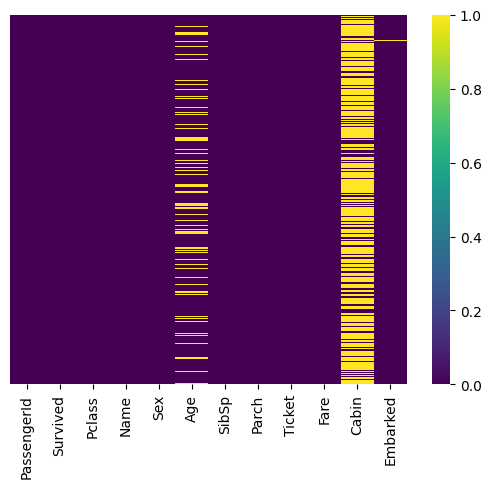

In [29]:
## we will use heatmap to visualize null data

sns.heatmap(df_train.isnull(), yticklabels=False,cmap="viridis")

Observations:

~ we get better understanding of null values in dataset.

###4. Visualizing the Data

<Axes: xlabel='Survived', ylabel='count'>

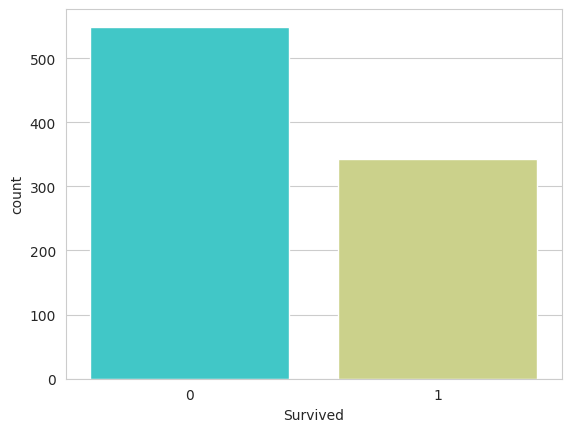

In [32]:
# making countplot to visualize the number of passengers survive
# Set Seaborn style
sns.set_style("whitegrid")

# Explicitly specify 'x' for the column name
sns.countplot(x="Survived", data=df_train, palette="rainbow")


In [33]:
# get the number of passenger survived

df_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


Observation:

~ Less number of passenger haven't survived.

<Axes: xlabel='Survived', ylabel='count'>

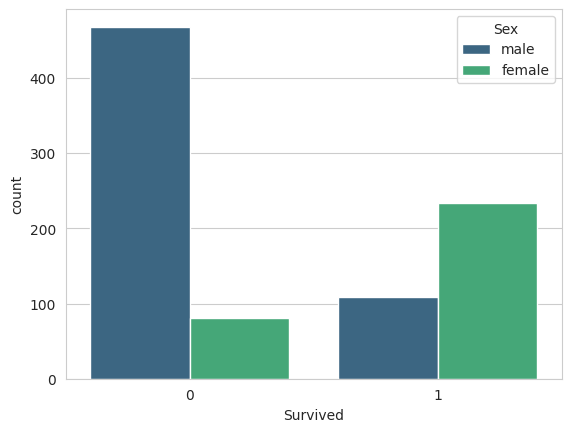

In [35]:
# now we will see survival of females and males

sns.countplot(x="Survived",hue='Sex',palette='viridis',data=df_train)

Observation:

~ Less number of male passenger survived. ~ More number of female are survived.

<Axes: xlabel='Survived', ylabel='count'>

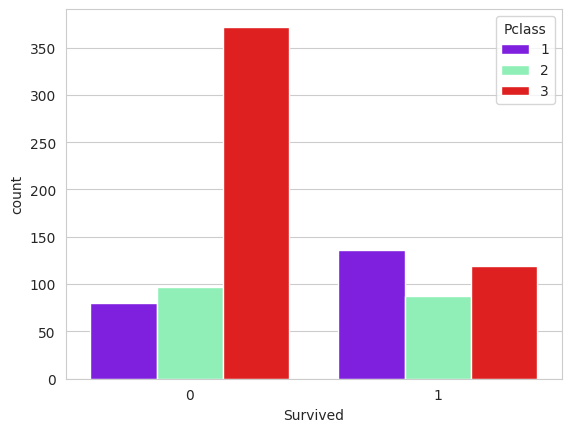

In [36]:
## We will see survival count respect to passenger class

sns.countplot(x="Survived",data=df_train,hue='Pclass',palette='rainbow')

Observation:

~ Less number of people survived who were in PClass 3. ~ More number of people survived who were in PClass 1.

<Axes: xlabel='Pclass', ylabel='count'>

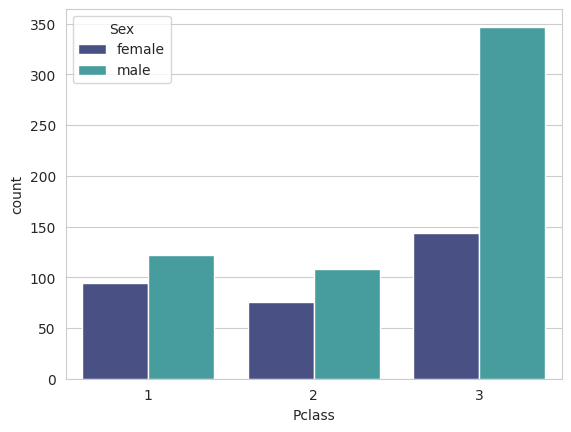

In [38]:
# Now we will plot the graph to get the count of male and female passengers in each class
sns.countplot(x='Pclass', data=df_train, palette="mako", hue="Sex")


Observations:

~ Pclass 1 and Pclass 2 has less number of male and female as compared to Pclass 3.

<Axes: xlabel='SibSp', ylabel='count'>

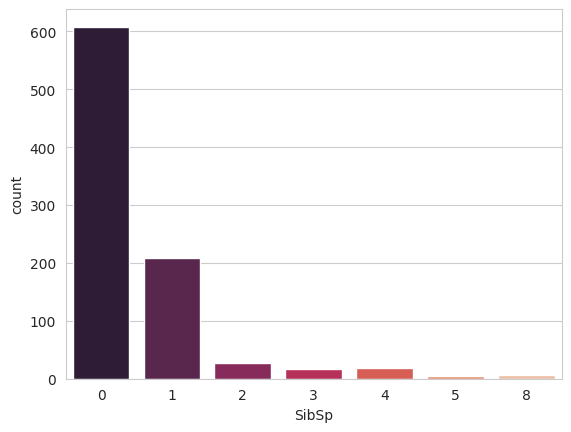

In [39]:
# Countplot for Sibling and spouse

sns.countplot(x="SibSp",data=df_train,palette='rocket')

Observations:

~ Most of the passenger were travelling alone. ~ Average passengers were travlling with 1 spouse or siblings.

<Axes: xlabel='Survived', ylabel='count'>

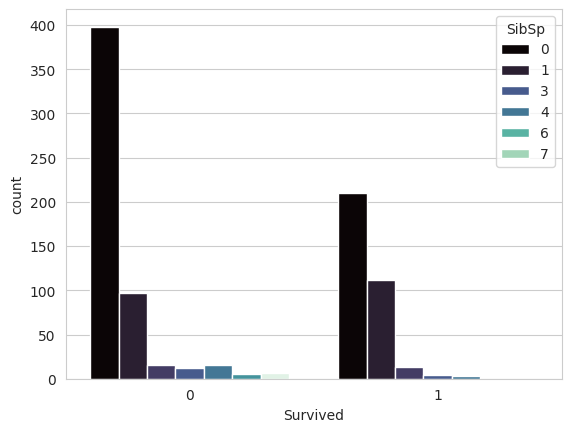

In [41]:
# Count plot for suvival and sibsp

sns.countplot(x='Survived',data=df_train,palette="mako",hue="SibSp")

<Axes: xlabel='Age', ylabel='count'>

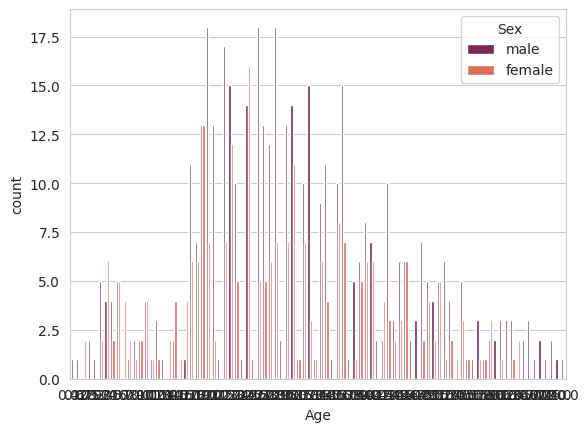

In [43]:
#Countplot for age and sex

sns.countplot(x='Age',data=df_train,palette='rocket',hue='Sex')

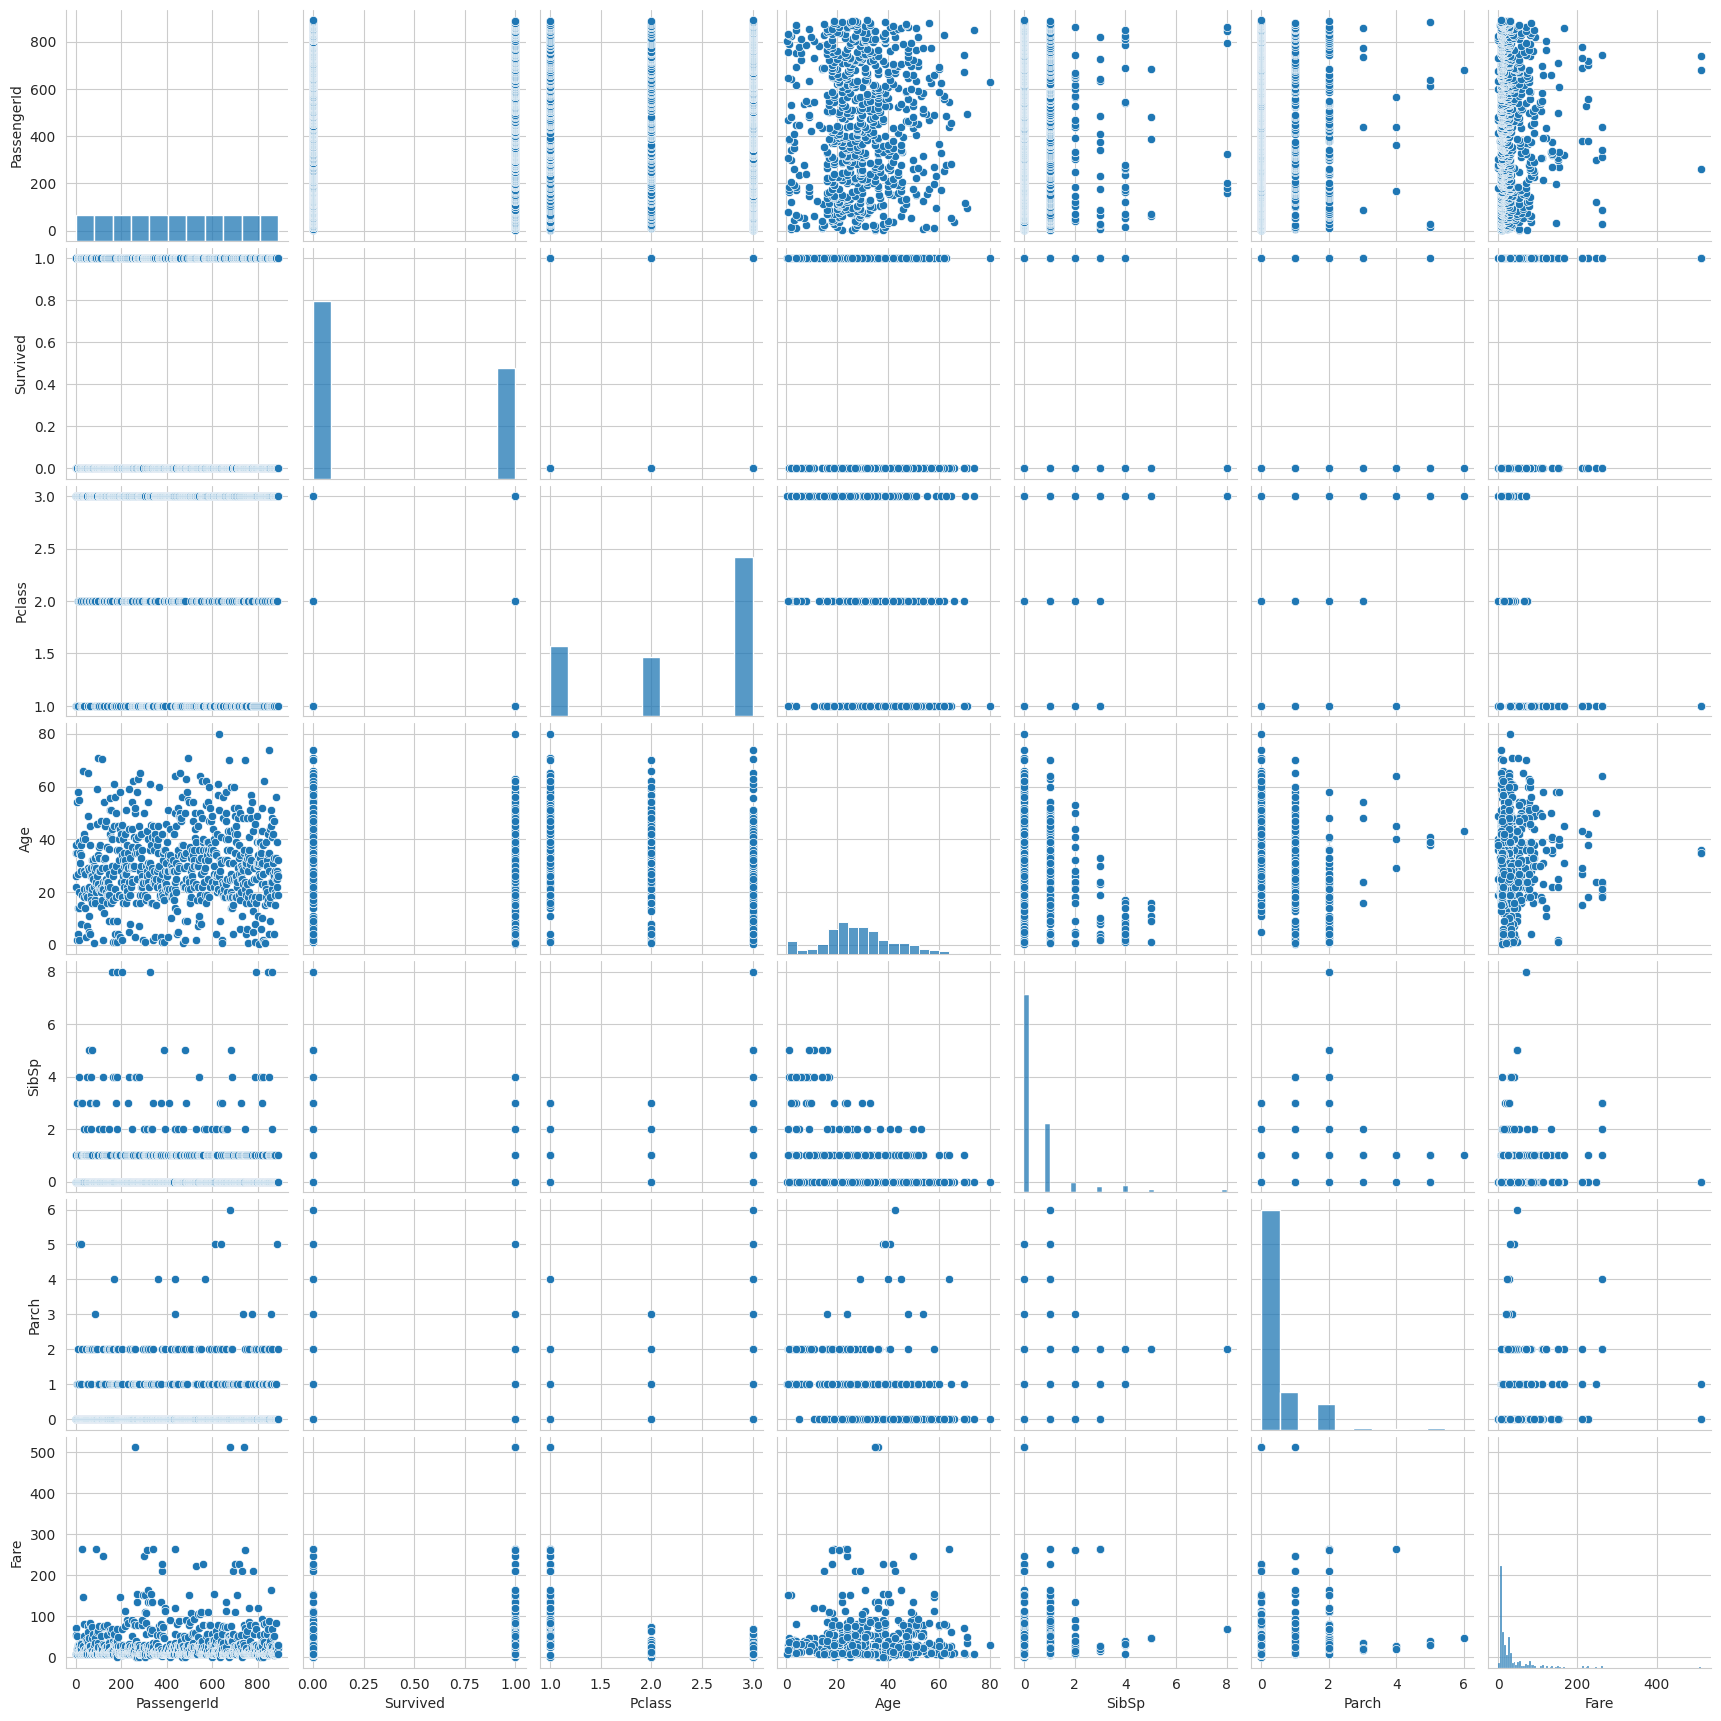

In [44]:
# Using pairplot for visibility of all data

sns.pairplot(df_train)

<Axes: xlabel='Age'>

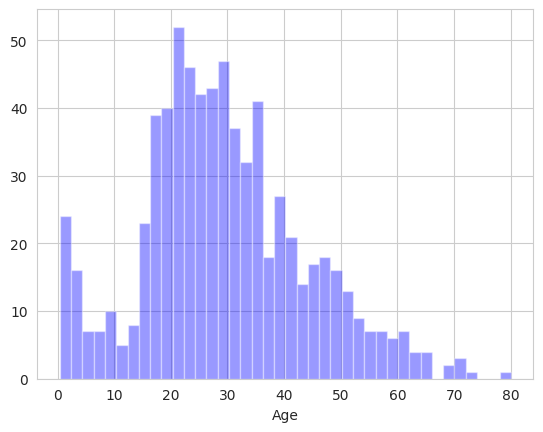

In [45]:
##plotting histogram to get maximum number oge (After dropping age)

sns.distplot(df_train['Age'].dropna(),kde=False,color='b',bins=40)


Observations:

~ Most of the passengers age lies between 20-35

<Axes: xlabel='Fare'>

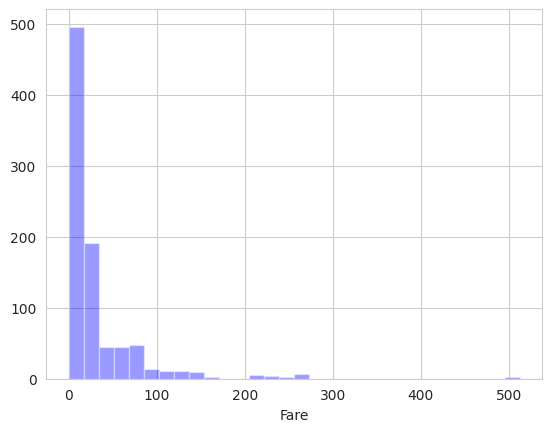

In [46]:
#we will find average fare of the passengers using histogram

sns.distplot(df_train['Fare'],kde=False,color='b',bins=30)

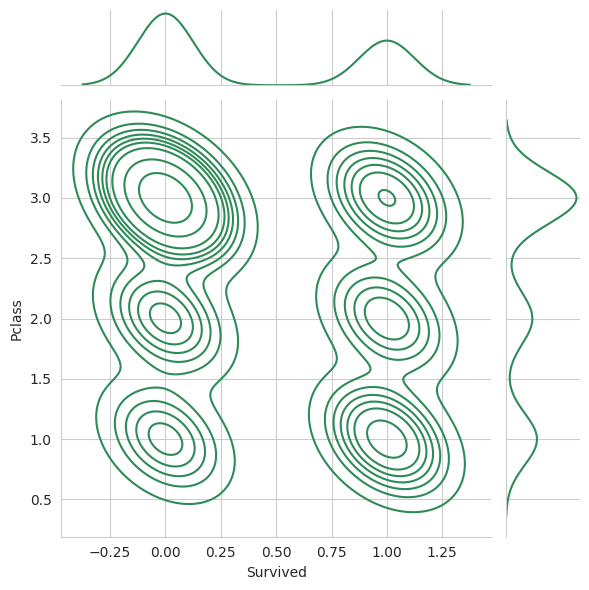

In [47]:
#Joint plot for survival and Pclass paramter to see corelation

sns.jointplot(data=df_train,x='Survived',y='Pclass',kind='kde',color='seagreen')

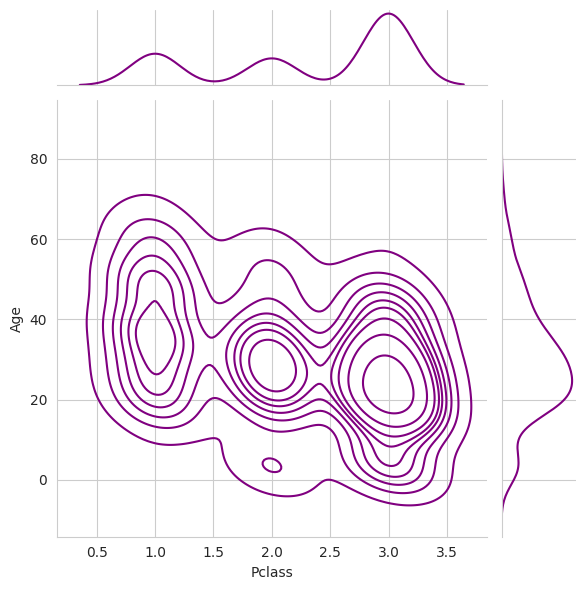

In [48]:
sns.jointplot(data=df_train,x='Pclass',y='Age',color="purple",kind='kde')


<Axes: xlabel='Survived', ylabel='Age'>

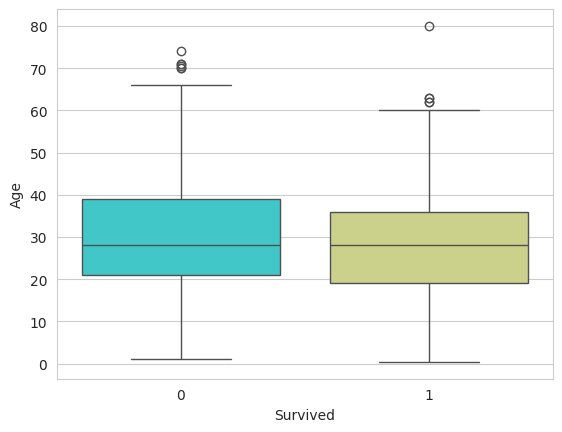

In [49]:
## Plotting box plot to get more information

sns.boxplot(data=df_train,x="Survived",y="Age",palette='rainbow')

Observation:

~ Survived age of people was average 29

<Axes: xlabel='Sex', ylabel='Age'>

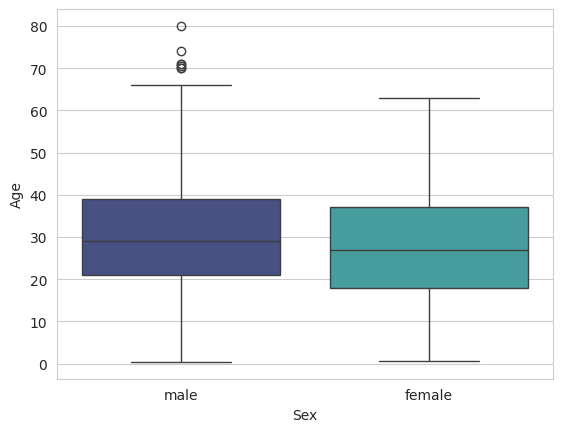

In [50]:
## Boxplot to get average age wrt to sex

sns.boxplot(data=df_train,y="Age",x="Sex",palette="mako")

Observation:

~ Average age of male was 26-29 ~ Average age of female was 23-27

<Axes: xlabel='Pclass', ylabel='Age'>

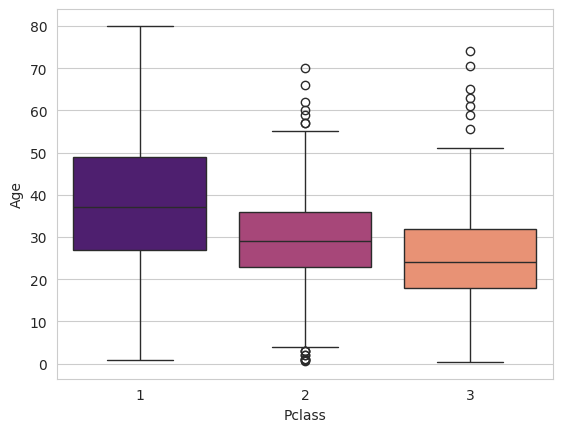

In [51]:
## Boxplot to get average age wrt pclass

sns.boxplot(data=df_train,x="Pclass",y="Age",palette="magma")

Observation:

~ Average age of in Pclass 1 is 38 ~ Average age of in Pclass 2 is 29 ~ Average age of in Pclass 3 is 24

## 5. Data Cleaning

In [54]:
df_train_numeric = df_train.select_dtypes(include=[np.number])
df_train_numeric.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

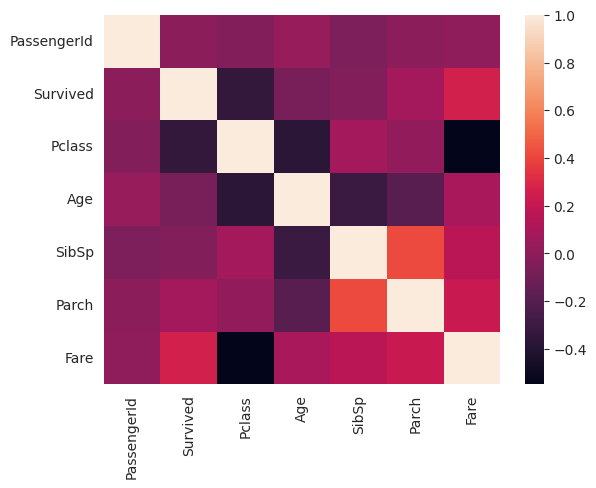

In [56]:
sns.heatmap(df_train_numeric.corr())

<Axes: >

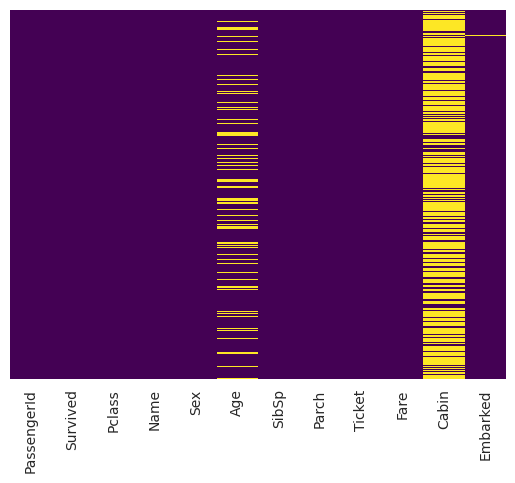

In [57]:
sns.heatmap(df_train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [58]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

   #if age column value is null
    if pd.isnull(Age):

       ## Pclass is 1 ,replace age to 37
        if Pclass == 1:
            return 38

        ## Pclass is 2 ,replace age to 29
        elif Pclass == 2:
            return 29

        ## Pclass is 3 ,replace age to 24
        else:
            return 24

    else:
        return Age

In [59]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age,axis=1)  ## applying

<Axes: >

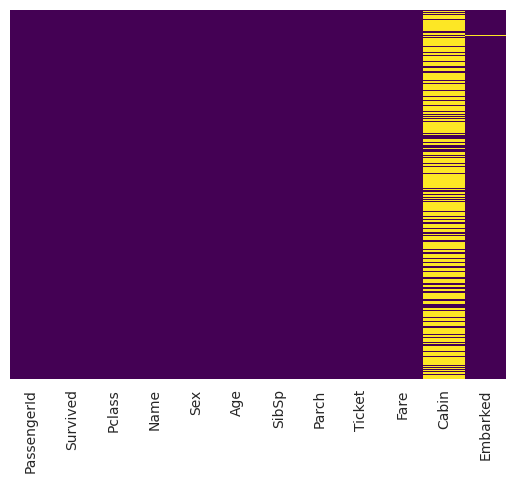

In [60]:
sns.heatmap(df_train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [61]:
## Now we will drop cabin column

df_train.drop('Cabin',axis=1,inplace=True)

<Axes: >

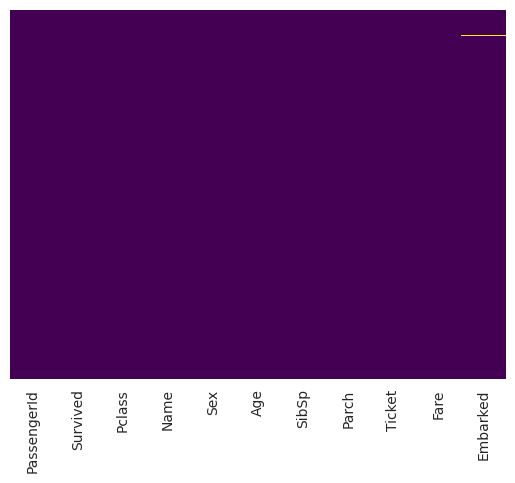

In [63]:
sns.heatmap(df_train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [64]:
# Finally we remove some remaining null values

df_train.dropna(inplace=True)

<Axes: >

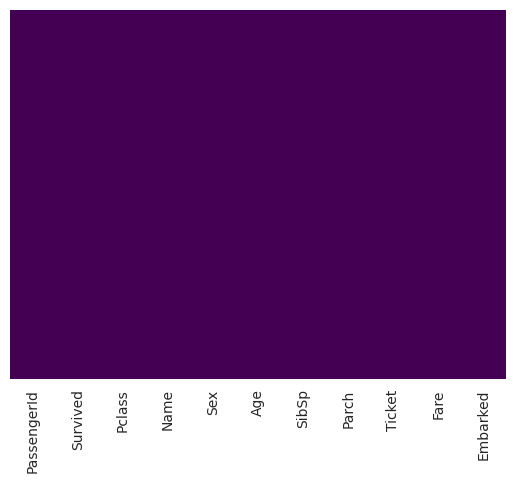

In [65]:
sns.heatmap(df_train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [66]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


So now, we dont have NULL values in our dataset

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##6. Converting Catagorical Columns

We will convert embarked and sex column to understand those features to ML algorithm

In [68]:
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
Embark=pd.get_dummies(df_train['Embarked'],drop_first=True)

In [69]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [70]:
Embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [71]:
# We will now remove unwanted columns which are not required in dataset

df_train.drop(['Name','Ticket','Embarked','Sex'],inplace=True,axis=1)

In [72]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [73]:
# Now we will add the converted columns to the data

df_train = pd.concat([df_train,sex,Embark],axis=1)

In [74]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Now our dataset is ready to model

## 7. Train Test Slipt

In [75]:
x= df_train.drop('Survived',axis=1)  ## Independent Variables
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [76]:
y=df_train['Survived']  ## Dependent Variable
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.40,random_state=1231)

##8. Logistic Regression

In [83]:
## We will import logistic regression and train the model

from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
logmodel = LogisticRegression()

# Display the model's parameters (hyperparameters)
print(logmodel.get_params())




{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [86]:
## lets see the predictions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

# Display the classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       221
           1       0.76      0.68      0.72       135

    accuracy                           0.80       356
   macro avg       0.79      0.78      0.78       356
weighted avg       0.80      0.80      0.80       356



In [87]:
## lets see the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[192,  29],
       [ 43,  92]])

True Positive: 107 True Negative: 92

False Positive: 29 False Negative: 43

In [88]:
## Accuracy score

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.797752808988764

# Hence, the accuracy score was 0.79 ,so around 79% of passengers survived in Titanic and 21% did not survived